In [1]:
import pandas as pd

co2 = pd.read_csv('co2.csv', sep='\t')

In [2]:
co2.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


In [3]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'media')

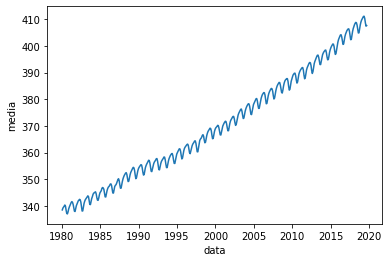

In [4]:
plt.plot(co2['data'],co2['media'])
plt.xlabel('data')
plt.ylabel('media')

In [5]:
nascimentos=pd.read_csv('nascimentos.csv')

In [6]:
nascimentos.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


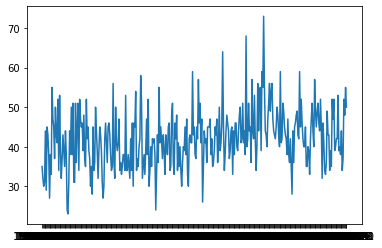

In [7]:
plt.plot(nascimentos['data'],nascimentos['n_nasc'])

In [8]:
nascimentos['data'] = pd.to_datetime(nascimentos['data'])

In [9]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Text(0.5, 0, 'Data')

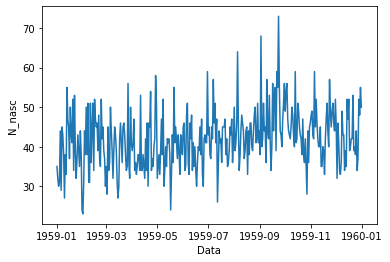

In [10]:
plt.plot(nascimentos['data'],nascimentos['n_nasc'])
plt.ylabel('N_nasc')
plt.xlabel('Data')

In [11]:
media_carb = co2['media'].mean()

In [12]:
dt_carb = co2['data'][1] - co2['data'][0]

Text(0, 0.5, 'media')

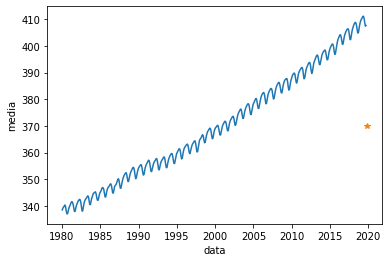

In [13]:
plt.plot(co2['data'],co2['media'])
plt.plot(co2.iloc[-1,0] + dt_carb, media_carb, '*')
plt.xlabel('data')
plt.ylabel('media')

In [14]:
media_nasc = nascimentos['n_nasc'].mean()

In [15]:
dt_nasc = nascimentos['data'][1] - nascimentos['data'][0]

Text(0.5, 0, 'Data')

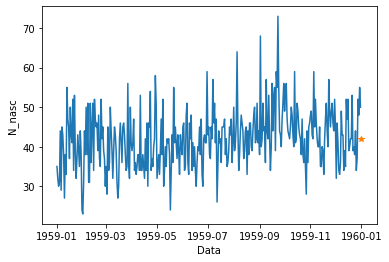

In [16]:
plt.plot(nascimentos['data'],nascimentos['n_nasc'])
plt.plot(nascimentos.iloc[-1,0]+dt_nasc,media_nasc,'*')
plt.ylabel('N_nasc')
plt.xlabel('Data')

In [17]:
co2.shape

(477, 2)

In [18]:
media_tres_pontos_c = co2['media'][474:476].mean()

Text(0, 0.5, 'media')

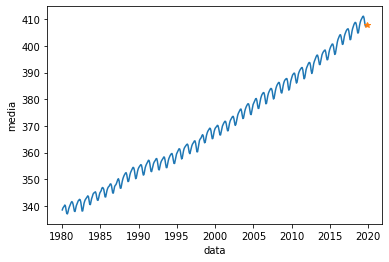

In [19]:
plt.plot(co2['data'],co2['media'])
plt.plot(co2.iloc[-1,0] + dt_carb, media_tres_pontos_c, '*')
plt.xlabel('data')
plt.ylabel('media')

In [20]:
nascimentos.shape

(365, 2)

In [21]:
media_tres_pontos_n = nascimentos['n_nasc'][362:364].mean()

Text(0.5, 0, 'Data')

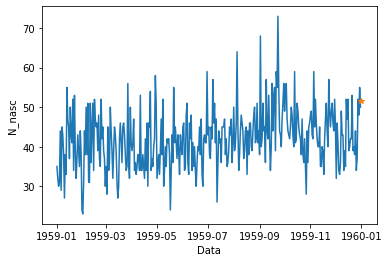

In [22]:
plt.plot(nascimentos['data'],nascimentos['n_nasc'])
plt.plot(nascimentos.iloc[-1,0]+dt_nasc,media_tres_pontos_n,'*')
plt.ylabel('N_nasc')
plt.xlabel('Data')

In [23]:
media_movel_c = co2.rolling(5).mean()
media_movel_c

,data,media
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,1980.2084,339.450
...,...,...
472,2019.2084,410.548
473,2019.2916,410.680
474,2019.3750,410.390
475,2019.4584,409.746


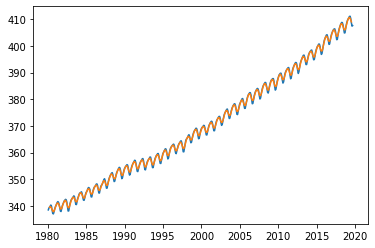

In [24]:
plt.plot(co2['data'],co2['media'])
plt.plot(media_movel_c['data'],media_movel_c['media'])

In [25]:
nascimentos

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [26]:
media_movel_n = nascimentos.rolling(5).mean()
media_movel_n

,n_nasc
0,NaN
1,NaN
2,NaN
3,NaN
4,34.4
...,...
360,38.6
361,41.0
362,43.0
363,45.2


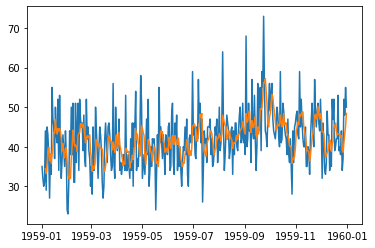

In [27]:
plt.plot(nascimentos['data'],nascimentos['n_nasc'])
plt.plot(nascimentos['data'],media_movel_n['n_nasc'])

In [28]:
!pip install statsmodels

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
result_c = seasonal_decompose(co2.set_index('data'), freq=35)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


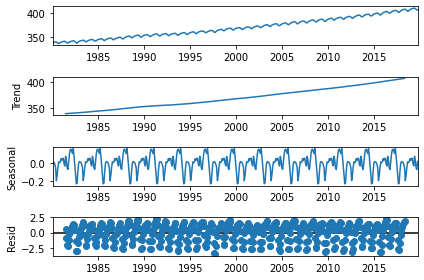

In [31]:
result_c.plot();

In [32]:
result_n = seasonal_decompose(nascimentos.set_index('data'), freq=35)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


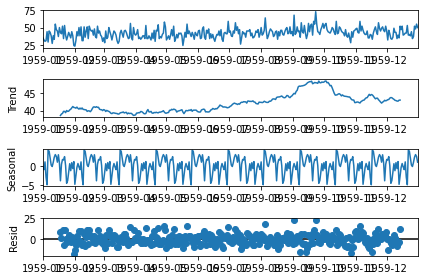

In [33]:
result_n.plot();

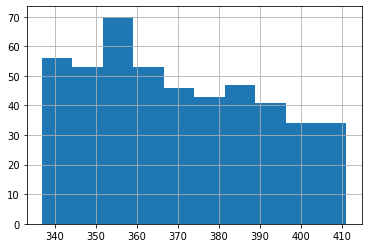

In [34]:
co2['media'].hist()

In [35]:
divide = int(len(co2)/2)

In [36]:
x=co2['media'].values

In [37]:
c1,c2 = x[0:divide],x[divide:]

In [38]:
c1.mean()

352.31550420168065

In [39]:
c2.mean()

387.816359832636

In [40]:
c1.var()

73.90219533401597

In [41]:
c2.var()

151.542490933282

In [42]:
divide = int(len(nascimentos)/2)

In [43]:
x = nascimentos['n_nasc'].values

In [44]:
n1, n2 = x[0:divide], x[divide:]

In [45]:
n1.mean()

39.76373626373626

In [46]:
n2.mean()

44.185792349726775

In [47]:
n2.var()

48.708650601690096

In [48]:
n1.var()

49.21341021615746

In [49]:
from statsmodels.tsa.stattools import adfuller

In [50]:
 resultado_c = adfuller(co2['media'].values)

In [51]:
print('Estatística ADF', resultado_c[0])

Estatística ADF 3.036828829167


In [52]:
print('p-valor %f' %resultado_c[1] )

p-valor 1.000000


In [53]:
resultado_n = adfuller(nascimentos['n_nasc'].values)

In [54]:
print('Estatística ADF', resultado_n[0])

Estatística ADF -4.808291253559765


In [55]:
print('p-valor %f' %resultado_n[1] )

p-valor 0.000052


In [56]:
co2 = co2.set_index('data')

In [57]:
co2

,media
data,
1980.042,338.45
1980.125,339.15
1980.208,339.48
1980.292,339.87
1980.375,340.30
...,...
2019.375,411.16
2019.458,410.35
2019.542,408.69


In [58]:
co2_treino = co2[1980.042:2015]

In [59]:
co2_teste = co2[2015:]

In [60]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [61]:
modelo_ajustado = SimpleExpSmoothing(co2_treino).fit(smoothing_level=0.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [62]:
co2_teste.shape

(57, 1)

In [63]:
modelo_previsto = modelo_ajustado.forecast(57)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


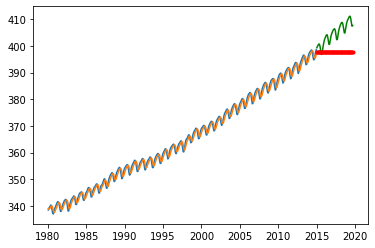

In [64]:
plt.plot(co2_treino)
plt.plot(co2_treino.index,modelo_ajustado.fittedvalues.values)
plt.plot(co2_teste,'g')
plt.plot(co2_teste.index, modelo_previsto, 'r.')

In [65]:
nascimentos = nascimentos.set_index('data')

In [66]:
nasc_treino = nascimentos['1959-01-01' : '1959-12-01']

In [67]:
nasc_teste = nascimentos['1959-12-01':]

In [68]:
modelo_ajustado = SimpleExpSmoothing(nasc_treino).fit(smoothing_level=0.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [69]:
nasc_teste.shape

(31, 1)

In [70]:
modelo_previsto = modelo_ajustado.forecast(31)

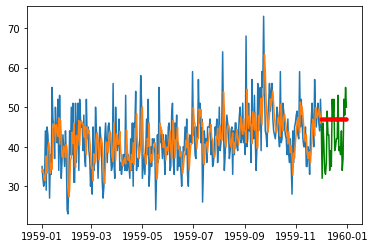

In [71]:
plt.plot(nasc_treino)
plt.plot(nasc_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(nasc_teste,'g')
plt.plot(nasc_teste.index,modelo_previsto,'r.')

In [72]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [73]:
modelo_ajustado = ExponentialSmoothing(co2_treino.values, trend='additive', seasonal='additive', seasonal_periods=35).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:735: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [74]:
co2.shape

(477, 1)

In [75]:
co2_teste.shape

(57, 1)

In [76]:
modelo_previsto = modelo_ajustado.predict(start=420, end=476)

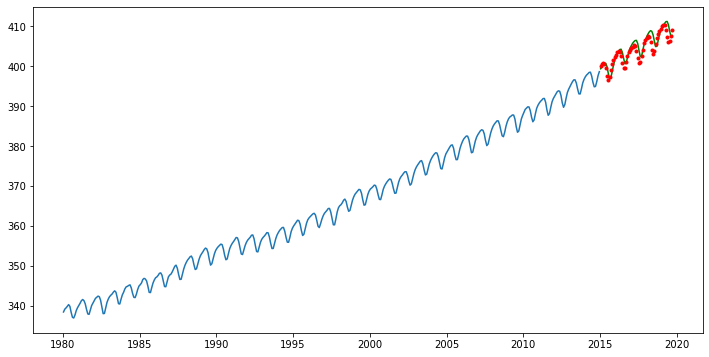

In [77]:
plt.figure(figsize=(12,6))
plt.plot(co2_treino)
plt.plot(co2_teste,'g')
plt.plot(co2_teste.index, modelo_previsto, 'r.')

In [78]:
modelo_ajustado = ExponentialSmoothing(nasc_treino.values, trend='multiplicative', seasonal=None).fit()

In [79]:
nasc_treino.shape

(335, 1)

In [80]:
nasc_teste.shape

(31, 1)

In [81]:
modelo_previsto_suave = modelo_ajustado.predict(start=335, end=365)

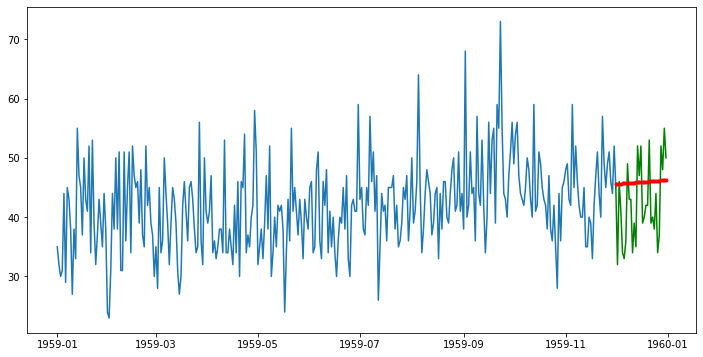

In [82]:
plt.figure(figsize=(12,6))
plt.plot(nasc_treino)
plt.plot(nasc_teste, 'g')
plt.plot(nasc_teste.index, modelo_previsto_suave, 'r.')

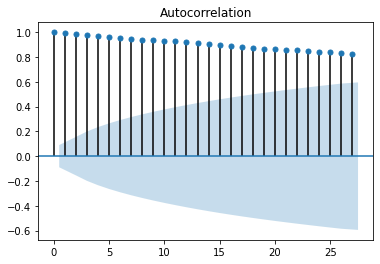

In [83]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(co2);

In [84]:
from statsmodels.graphics.tsaplots import plot_pacf

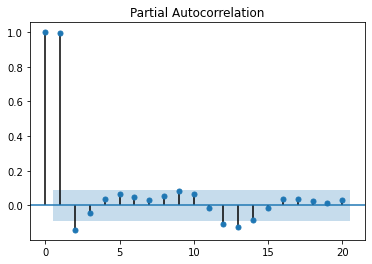

In [85]:
plot_pacf(co2, lags=20);

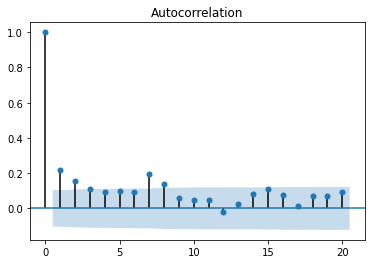

In [86]:
plot_acf(nascimentos['n_nasc'], lags=20);

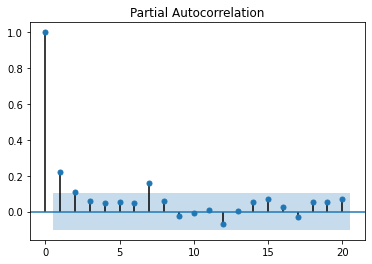

In [87]:
plot_pacf(nascimentos['n_nasc'], lags=20);

In [91]:
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

In [92]:
lista = np.linspace(1,40,40)

modelo_ajustado = AutoReg(co2_treino.values, lags=lista, trend='c', seasonal=True, period=35).fit()

In [93]:
modelo_previsto = modelo_ajustado.predict(start=420, end=476)

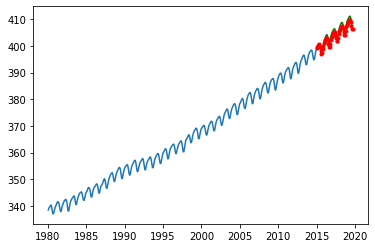

In [94]:
plt.plot(co2_treino)
plt.plot(co2_teste,'g')
plt.plot(co2_teste.index, modelo_previsto, 'r.')

In [95]:
modelo_ajustado = AutoReg(nasc_treino.values, lags=lista, trend='c', seasonal=True, period=35).fit()

In [96]:
modelo_previsto_ar = modelo_ajustado.predict(start=335,end=365)

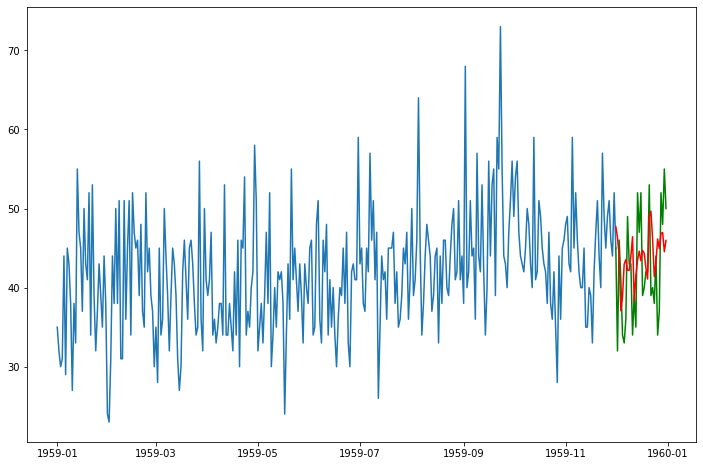

In [99]:
plt.figure(figsize=(12,8))
plt.plot(nasc_treino)
plt.plot(nasc_teste,'g')
plt.plot(nasc_teste.index, modelo_previsto_ar, 'r')

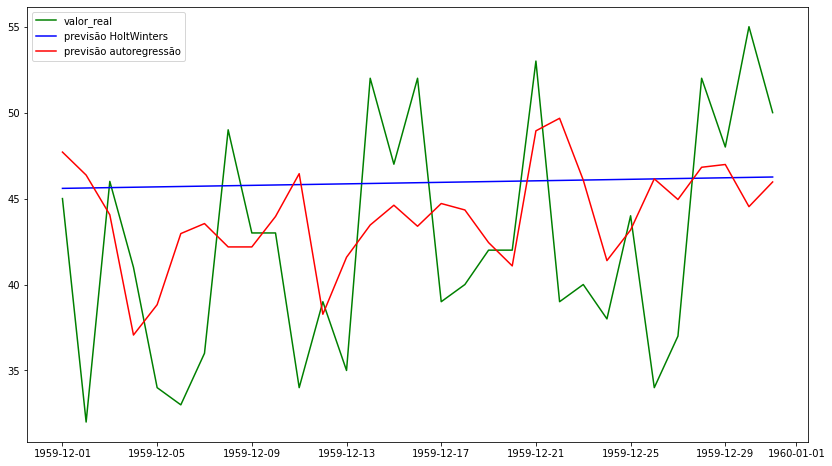

In [101]:
plt.figure(figsize=(14,8))
plt.plot(nasc_teste,'g',label='valor_real')
plt.plot(nasc_teste.index,modelo_previsto_suave, 'b-', label='previsão HoltWinters')
plt.plot(nasc_teste.index,modelo_previsto_ar, 'r', label='previsão autoregressão')
plt.legend()

In [102]:
Erro_prev_s = nasc_teste['n_nasc'] - modelo_previsto_suave

In [103]:
Erro_prev = nasc_teste['n_nasc'] - modelo_previsto_ar

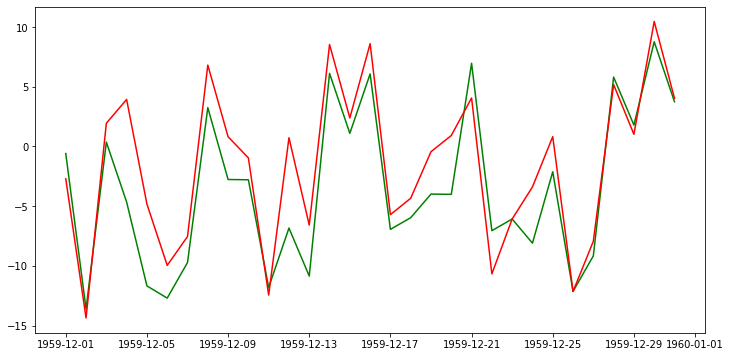

In [105]:
plt.figure(figsize=(12,6))
plt.plot(Erro_prev_s, 'g')
plt.plot(Erro_prev, 'r')

In [107]:
np.mean(Erro_prev_s)

-3.5361257930475367

In [108]:
np.mean(Erro_prev)

-1.6083080804496934

In [109]:
np.mean(np.abs(Erro_prev_s))

6.374537352069753

In [110]:
np.mean(np.abs(Erro_prev))

5.496720548092117

In [111]:
from sklearn.metrics import mean_absolute_error

In [112]:
mae = mean_absolute_error(nasc_teste['n_nasc'], modelo_previsto_ar)

In [113]:
mae

5.496720548092117

In [114]:
from sklearn.metrics import mean_squared_error

In [115]:
mean_squared_error(nasc_teste['n_nasc'], modelo_previsto_suave)

54.39586172649378

In [116]:
mean_squared_error(nasc_teste['n_nasc'], modelo_previsto_ar)

45.43739422181245